In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',120)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from statistic import Statistic
from utils import UtilsKy

In [20]:
path_df = UtilsKy.PATH_KYW3 + '02_pure_data/kyw3_for_resolve.csv'

In [23]:
df = pd.read_csv(path_df, dtype=str, sep=',', keep_default_na=False)#nrows=99

In [24]:
df.head()

,order_id,type,status,date,processed,amount,currency,card_holder,email,phone,address,city_from_order,country,zip,ip,project_id,reported,status_chargeback,date_cb_only,card_masked,card_expire,amount_in_currency,date_only,id
0,49219577955111383,charge,false,2019-11-20 09:39:36,2019-11-20 09:39:41,1.00,USD,Gabriele Markes,gabriele@markes.com,5556789364528,Saint Brabus AMG 12,New Lake,USA,56789,84.56.163.85,1a92804aa92f2a762361fcd2b6cc0794360b23bd,,refunded,2019-11-20,547087******1680,2022-04,1.00,2019-11-20,547087******1680_2022-04
1,49221760925063337,charge,false,2019-11-20 12:01:43,2019-11-20 12:01:50,25.00,USD,Malia Gusman,560100032720@4null.com,8086510074,5263 Ihilani place,Kapaa,USA,96746,204.210.126.255,1a92804aa92f2a762361fcd2b6cc0794360b23bd,,charged,2019-11-20,517148******7320,2023-04,25.00,2019-11-20,517148******7320_2023-04
2,49224688788195598,charge,false,2019-11-20 15:12:20,2019-11-20 15:12:24,21.18,USD,Stephen Gordy,560536900411@4null.com,7406005440,2111 Bishop Hill Road,Chillicothe,USA,45601,99.203.145.83,1a92804aa92f2a762361fcd2b6cc0794360b23bd,,charged,2019-11-20,546540******9404,2023-07,21.18,2019-11-20,546540******9404_2023-07
3,49224696921328680,charge,false,2019-11-20 15:12:52,2019-11-20 15:12:55,200.00,USD,Nicholas Saephanh,560131190505@4null.com,5102929855,1502 International Blvd,Oakland,USA,94606,69.181.49.246,9ffa75299b6caaa89457fb07db86f47f8fb8198a,,charged,2019-11-20,510805******1186,2023-03,200.00,2019-11-20,510805******1186_2023-03
4,49224839756465248,charge,false,2019-11-20 15:22:10,2019-11-20 15:22:13,2.38,USD,Thiago Fernandes,550322045766@4null.com,21994891341,Rua sumidouro 35,Rio de Janeiro,BRA,21540590,179.158.244.208,1a92804aa92f2a762361fcd2b6cc0794360b23bd,,charged,2019-11-20,544731******7316,2026-07,2.38,2019-11-20,544731******7316_2026-07


In [25]:
df.dtypes

order_id              object
type                  object
status                object
date                  object
processed             object
amount                object
currency              object
card_holder           object
email                 object
phone                 object
address               object
city_from_order       object
country               object
zip                   object
ip                    object
project_id            object
reported              object
status_chargeback     object
date_cb_only          object
card_masked           object
card_expire           object
amount_in_currency    object
date_only             object
id                    object
dtype: object

In [26]:
df['year_month'] = df.date_only.str[:7]
df['status'] = df["status"].astype('category')
df['help'] = 1
df.amount = df.amount.astype('float')

In [32]:
Statistic.get_table_agg(df, 'status_chargeback')

,n_status_chargeback
status_chargeback,
charged,556945
chargedback,13322
error,149
refunded,4010


In [48]:
stat_year_month = Statistic.get_stat_summarise_by_column(df, 'year_month')
stat_year_month = stat_year_month.reset_index()
stat_year_month

,year_month,n,amount_total,n_bad,amount_bad,cb_rate,cb_rate_amount,true_amount_weight,false_amount_weight,true_weight,false_weight,p,p_a
0,2019-11,21155,1.848426e+06,414,45292.88,1.9570,2.4503,0.038267,0.037777,0.046829,0.036675,0.560802,0.503217
1,2019-12,121445,1.153591e+07,2159,321305.19,1.7778,2.7853,0.271427,0.234956,0.243737,0.210916,0.536095,0.536011
2,2020-01,144678,1.354189e+07,2566,356299.50,1.7736,2.6311,0.300989,0.276250,0.289664,0.251276,0.535483,0.521428
3,2020-02,105474,7.641566e+06,1432,167630.75,1.3577,2.1937,0.141611,0.156586,0.161702,0.183963,0.467800,0.474892
4,2020-03,90685,6.209645e+06,1417,147023.59,1.5626,2.3677,0.124203,0.127017,0.160009,0.157840,0.503412,0.494399
5,2020-04,66523,5.471041e+06,680,104150.75,1.0222,1.9037,0.087987,0.112441,0.076845,0.116421,0.397612,0.438994
6,2020-05,24466,2.665973e+06,193,42077.07,0.7888,1.5783,0.035550,0.054973,0.021891,0.042920,0.337770,0.392719


In [40]:
col_names = ['year_month', 'cb_rate', 'cb_rate_amount',]
st_cb_rate = stat_year_month.loc[:,col_names]
st_cb_rate

,year_month,cb_rate,cb_rate_amount
0,2019-11,1.9570,2.4503
1,2019-12,1.7778,2.7853
2,2020-01,1.7736,2.6311
3,2020-02,1.3577,2.1937
4,2020-03,1.5626,2.3677
5,2020-04,1.0222,1.9037
6,2020-05,0.7888,1.5783


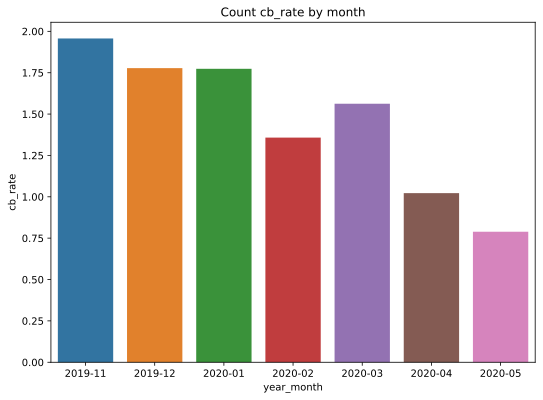

In [45]:
size_plot = (8.7, 6.27)
fig, ax = plt.subplots(figsize=size_plot)
plt.title('Count cb_rate by month')
sns.barplot(x="year_month", y="cb_rate", data=st_cb_rate)

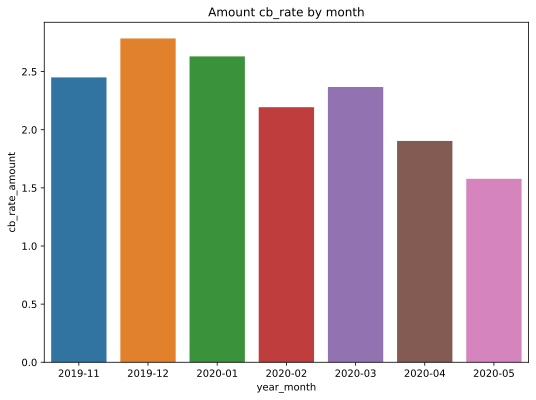

In [47]:
size_plot = (8.7, 6.27)
fig, ax = plt.subplots(figsize=size_plot)
plt.title('Amount cb_rate by month')
sns.barplot(x="year_month", y="cb_rate_amount", data=st_cb_rate)

In [65]:
stat_country = Statistic.get_stat_summarise_by_column(df,'country')

In [66]:
stat_country = stat_country[stat_country.cb_rate > 0]
stat_country = stat_country.reset_index()
stat_country

,country,n,amount_total,n_bad,amount_bad,cb_rate,cb_rate_amount,true_amount_weight,false_amount_weight,true_weight,false_weight,p,p_a
0,ARG,800,1.541103e+04,7,109.95,0.8750,0.7135,0.000099,0.000321,0.000903,0.001404,0.391363,0.235035
1,AUS,59,5.670440e+03,6,1211.22,10.1695,21.3602,0.001029,0.000094,0.000790,0.000095,0.892158,0.916680
2,BRA,8106,1.172591e+05,156,6085.05,1.9245,5.1894,0.005146,0.002329,0.017716,0.014058,0.557556,0.688401
3,CAN,26098,2.544968e+06,165,26113.38,0.6322,1.0261,0.022065,0.052772,0.018732,0.045855,0.290024,0.294838
4,IND,269,8.853120e+03,10,492.04,3.7175,5.5578,0.000421,0.000175,0.001241,0.000460,0.729733,0.706211
5,MEX,58,4.149830e+03,2,320.56,3.4483,7.7247,0.000276,0.000080,0.000339,0.000101,0.770585,0.774870
6,USA,538983,4.621365e+07,8515,1149447.53,1.5798,2.4872,0.970998,0.944135,0.960957,0.937944,0.506060,0.507013


In [70]:
col_names = ['country', 'cb_rate', 'cb_rate_amount',]
st_cb_rate_country = stat_country.loc[:,col_names]
st_cb_rate_country

,country,cb_rate,cb_rate_amount
0,ARG,0.8750,0.7135
1,AUS,10.1695,21.3602
2,BRA,1.9245,5.1894
3,CAN,0.6322,1.0261
4,IND,3.7175,5.5578
5,MEX,3.4483,7.7247
6,USA,1.5798,2.4872


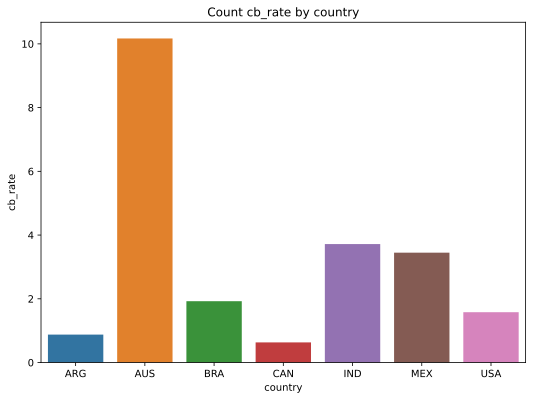

In [71]:
size_plot = (8.7, 6.27)
fig, ax = plt.subplots(figsize=size_plot)
plt.title('Count cb_rate by country')
sns.barplot(x="country", y="cb_rate", data=st_cb_rate_country)

In [76]:
stat_currency = Statistic.get_stat_summarise_by_column(df,'currency')
stat_currency = stat_currency.reset_index()
stat_currency

,currency,n,amount_total,n_bad,amount_bad,cb_rate,cb_rate_amount,true_amount_weight,false_amount_weight,true_weight,false_weight,p,p_a
0,CAD,26098,2.544968e+06,165,26113.38,0.6322,1.0261,0.022065,0.052772,0.018732,0.045855,0.290024,0.294838
1,INR,268,8.844780e+03,10,492.04,3.7313,5.5631,0.000421,0.000175,0.001241,0.000458,0.730492,0.706418
2,USD,548060,4.636064e+07,8686,1157174.31,1.5849,2.4960,0.977525,0.947053,0.980253,0.953691,0.506867,0.507917


In [80]:
col_names = ['currency', 'cb_rate', 'cb_rate_amount',]
st_cb_rate_currency = stat_currency.loc[:,col_names]
st_cb_rate_currency

,currency,cb_rate,cb_rate_amount
0,CAD,0.6322,1.0261
1,INR,3.7313,5.5631
2,USD,1.5849,2.4960


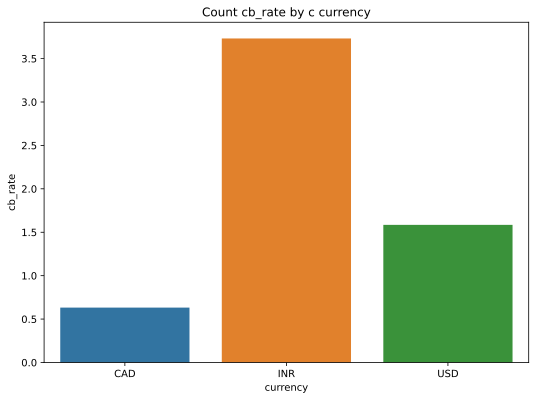

In [81]:
size_plot = (8.7, 6.27)
fig, ax = plt.subplots(figsize=size_plot)
plt.title('Count cb_rate by c currency')
sns.barplot(x="currency", y="cb_rate", data=st_cb_rate_currency)